<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**XGBoost**: The best classifier and regressor

#Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataSet = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataSet

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
# Problem Statemen is to predict whether the asset is purchased or not

In [ ]:
x = dataSet.iloc[:,:-1].values
y = dataSet.iloc[:, -1].values
x

#Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 7)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
print(x_train)

#Fitting the XGBoost model on our data set

In [9]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [10]:
xgb.fit(x_train, y_train)

XGBClassifier()

In [11]:
xgb.score(x_train, y_train)

0.95

In [12]:
xgb.score(x_test, y_test)

0.875

#Predicting on test data set

In [13]:
y_pred = xgb.predict(x_test)

In [14]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [15]:
y_test

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [16]:
from sklearn.metrics import jaccard_score
# Jaccard score is the ratio of intersection of actual and predicted outputs to union of actual and predicted outputs
jaccard_score(y_test, y_pred,pos_label=0)

0.8275862068965517

In [ ]:
# to compare the predicted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Confusion Matrix

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  6]
 [ 4 22]]


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.875

In [20]:
# we get accuracy of almost 80% 

In [21]:
import seaborn as sns

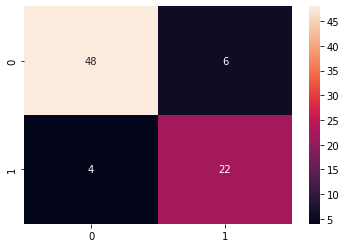

In [22]:
sns.heatmap(cm, annot=True)

#Visualisation of training dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


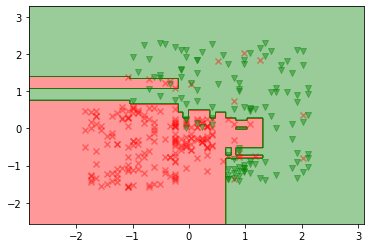

In [23]:
from matplotlib.colors import ListedColormap

markers = ('x', 'v')
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_train))])

    # plot the decision surface
x1_min, x1_max = x_train[:, 0].min() - 1,  x_train[:, 0].max() + 1    
x2_min, x2_max =  x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z = xgb.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=x_train[y_train == cl, 0], y=x_train[y_train == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)

#Visualisation of testing dataset


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


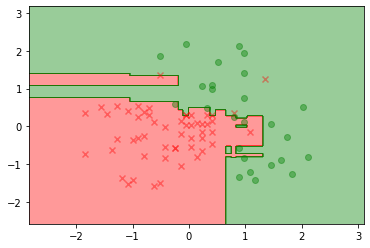

In [24]:
from matplotlib.colors import ListedColormap

markers = ('x', 'o', '^', 'v')
colors = ('red','green', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

    # plot the decision surface
x1_min, x1_max = x_test[:, 0].min() - 1,  x_test[:, 0].max() + 1    
x2_min, x2_max =  x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
np.arange(x2_min, x2_max, 0.02))
Z =xgb.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test[y_test == cl, 0], y=x_test[y_test == cl, 1],
                alpha=0.4, c=cmap(idx),
                marker=markers[idx], label=cl)

#Working on breast cancer dataset

###Importing Dataset

In [25]:
dataSet = pd.read_csv('data.csv')
dataSet

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [26]:
x = dataSet.iloc[:,2:14].values
y = dataSet.iloc[:, 1].values

In [ ]:
y

In [28]:
x

array([[1.80e+01, 1.04e+01, 1.23e+02, ..., 7.87e-02, 1.09e+00, 9.05e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, ..., 5.67e-02, 5.43e-01, 7.34e-01],
       [1.97e+01, 2.12e+01, 1.30e+02, ..., 6.00e-02, 7.46e-01, 7.87e-01],
       ...,
       [1.66e+01, 2.81e+01, 1.08e+02, ..., 5.65e-02, 4.56e-01, 1.07e+00],
       [2.06e+01, 2.93e+01, 1.40e+02, ..., 7.02e-02, 7.26e-01, 1.59e+00],
       [7.76e+00, 2.45e+01, 4.79e+01, ..., 5.88e-02, 3.86e-01, 1.43e+00]])

###Splitting the dataset

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 77)

###Feature Scaling

In [30]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
print(x_train)

[[-0.49 -0.99 -0.56 ... -0.71 -1.03 -1.  ]
 [ 1.13  0.15  1.1  ... -0.72  0.11 -0.82]
 [ 0.1   1.89  0.17 ...  1.1  -0.15 -0.35]
 ...
 [ 0.86  1.4   0.81 ... -1.18  0.33  0.81]
 [-0.65 -0.43 -0.68 ... -0.76 -0.72  0.02]
 [-0.05  0.44 -0.11 ... -0.6  -0.54  0.49]]


###Training the model

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier()

In [32]:
xgb.score(x_train, y_train)


0.9956043956043956

In [33]:
xgb.score(x_test, y_test)


0.9473684210526315

###Confusion Matrix

In [34]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[72  3]
 [ 3 36]]


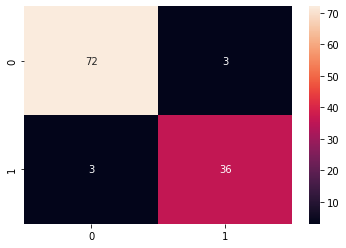

In [35]:
sns.heatmap(cm, annot=True)

###Visualisation of the data

In [ ]:
# to compare the prediceted and actual outputs let us concatenate both of em and print so that it is easy to check ;)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))